In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from functools import partial

from CASutils import mapplot_utils as mymaps
from CASutils import colorbar_utils as cbars

import warnings
warnings.filterwarnings('ignore')

In [2]:
plotpath="/project/cas/islas/python_plots/singleforcing_paper/figures/supplemental/"

In [3]:
landfrac = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/ocn_wgts/LANDFRAC_LENS2.nc")

In [4]:
# pre-processor to ensure all lon and lat coordinates are the same.  Also adding flexibility for reading in seasonal data
# Taking the ensemble mean
def preprocessor(ds):
    ds['lon'] = landfrac.lon ; ds['lat'] = landfrac.lat
    ds = ds.mean('M')
    ds['time'] = ds.time.dt.year
    ds = ds.rename({'time':'year'})
    ds = ds.sel(year=slice(1920,2050))
    return ds

In [5]:
lens2 = xr.open_mfdataset('/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2/LENS2_FSNO_jja.nc', preprocess=partial(preprocessor))
xaer2 = xr.open_mfdataset('/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM2-XAAER/xAER_FSNO_jja.nc', preprocess=partial(preprocessor))
aaer2 = xr.open_mfdataset('/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/AAER_FSNO_jja.nc', preprocess=partial(preprocessor))

In [6]:
lens1 = xr.open_mfdataset('/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1/LENS1_FSNO_jja.nc', preprocess=partial(preprocessor))
xaer1 = xr.open_mfdataset('/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1-SF/XAER_FSNO_jja.nc', preprocess=partial(preprocessor))
aaer1 = xr.open_mfdataset('/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM1-AAER/AAER_FSNO_jja.nc', preprocess=partial(preprocessor))

In [7]:
lens2_icefrac = xr.open_mfdataset('/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2/LENS2_ICEFRAC_jja.nc', preprocess=partial(preprocessor))
xaer2_icefrac = xr.open_mfdataset('/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM2-XAAER/xAER_ICEFRAC_jja.nc', preprocess=partial(preprocessor))
aaer2_icefrac = xr.open_mfdataset('/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/AAER_ICEFRAC_jja.nc', preprocess=partial(preprocessor))

In [8]:
lens1_icefrac = xr.open_mfdataset('/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1/LENS1_ICEFRAC_jja.nc', preprocess=partial(preprocessor))
xaer1_icefrac = xr.open_mfdataset('/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1-SF/XAER_ICEFRAC_jja.nc', preprocess=partial(preprocessor))
aaer1_icefrac = xr.open_mfdataset('/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM1-AAER/AAER_ICEFRAC_jja.nc', preprocess=partial(preprocessor))

In [9]:
lens1_1920_1940 = lens1.sel(year=slice(1920,1940)).mean('year')
lens2_1920_1940 = lens2.sel(year=slice(1920,1940)).mean('year')

lens1_icefrac_1920_1940 = lens1_icefrac.sel(year=slice(1920,1940)).mean('year')
lens2_icefrac_1920_1940 = lens2_icefrac.sel(year=slice(1920,1940)).mean('year')

In [10]:
lens1_icefrac_1960_1980 = lens1_icefrac.sel(year=slice(1960,1980)).mean('year')
lens2_icefrac_1960_1980 = lens2_icefrac.sel(year=slice(1960,1980)).mean('year')

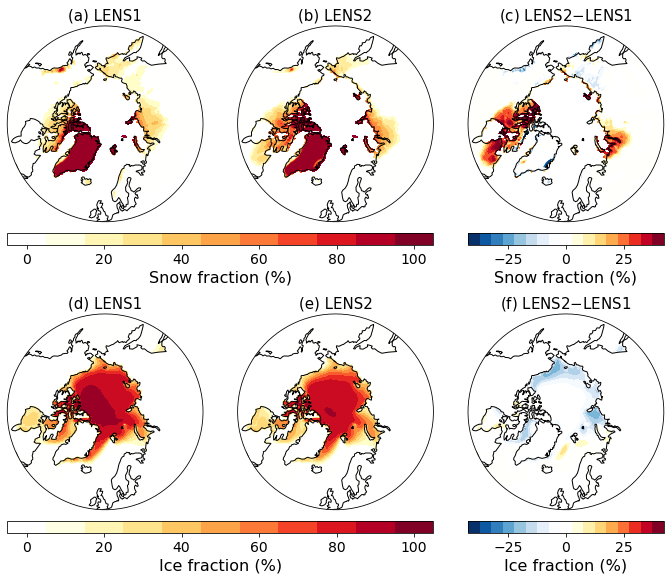

In [11]:
fig = plt.figure(figsize=(16,16))

ax = mymaps.contourmap_bothcontinents_northstereo_pos(fig, 100.*lens1_1920_1940.FSNO, lens1_1920_1940.lon, lens1_1920_1940.lat, 10, -100, 100,'(a) LENS1',
                                                      0.3,0.47,0.85,0.85+0.17, latlim=50.)

ax = mymaps.contourmap_bothcontinents_northstereo_pos(fig, 100.*lens2_1920_1940.FSNO, lens2_1920_1940.lon, lens2_1920_1940.lat, 10, -100,100,'(b) LENS2',
                                                      0.5,0.67,0.85,0.85+0.17, latlim=50.)

ax = cbars.plotcolorbar(fig, 10, -100, 100, 'Snow fraction (%)',0.3,0.67,0.83,0.84, posneg='pos')

ax = mymaps.contourmap_bothcontinents_northstereo_pos(fig, 100.*lens2_1920_1940.FSNO - 100.*lens1_1920_1940.FSNO, lens1_1920_1940.lon, lens1_1920_1940.lat, 
                                                      5,-40.,40.,'(c) LENS2$-$LENS1',0.7,0.87,0.85,0.85+0.17, latlim=50)

ax = cbars.plotcolorbar(fig, 5, -40, 40, 'Snow fraction (%)', 0.7,0.87,0.83,0.84)



ax = mymaps.contourmap_bothcontinents_northstereo_pos(fig, 100.*lens1_icefrac_1920_1940.ICEFRAC, lens1_icefrac_1920_1940.lon, lens1_icefrac_1920_1940.lat, 
                                                      10, -100, 100,'(d) LENS1',
                                                      0.3,0.47,0.6,0.6+0.17, latlim=50.)

ax = mymaps.contourmap_bothcontinents_northstereo_pos(fig, 100.*lens2_icefrac_1920_1940.ICEFRAC, lens2_icefrac_1920_1940.lon, lens2_icefrac_1920_1940.lat, 
                                                      10, -100,100,'(e) LENS2',
                                                      0.5,0.67,0.6,0.6+0.17, latlim=50.)

ax = cbars.plotcolorbar(fig, 10, -100, 100, 'Ice fraction (%)',0.3,0.67,0.58,0.59, posneg='pos')

ax = mymaps.contourmap_bothcontinents_northstereo_pos(fig, 100.*lens2_icefrac_1920_1940.ICEFRAC - 100.*lens1_icefrac_1920_1940.ICEFRAC, 
                                                      lens1_icefrac_1920_1940.lon, lens1_icefrac_1920_1940.lat, 
                                                      5,-40.,40.,'(f) LENS2$-$LENS1',0.7,0.87,0.6,0.6+0.17, latlim=50)

ax = cbars.plotcolorbar(fig, 5, -40, 40, 'Ice fraction (%)',0.7,0.87,0.58,0.59)


fig.savefig(plotpath+'figS14.png', bbox_inches='tight', facecolor='white')
fig.savefig(plotpath+'figS14.pdf', bbox_inches='tight', facecolor='white')